In [1]:
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
mask1 = np.array([[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]])
mask2 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])
mask3 = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])

In [3]:
#라플라시안 필터 : 2차 미분, 기울기의 기울기, 좀더 정확한 edge를 검출하기 위해 사용됨
laplacian1 = cv2.filter2D(gray, -1, mask1)
laplacian2 = cv2.filter2D(gray, -1, mask2)
laplacian3 = cv2.filter2D(gray, -1, mask3)
laplacian4 = cv2.Laplacian(gray, -1) # 라플라시안 함수, mask1 적용

In [4]:
#LoG : Laplacian of Gaussian(더 선명한 edge 검출)
# 가우시안 블러를 적용한 후 라플라시안을 사용하는 필터
gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
# (적용할 이미지, 필터 크기, 알파값), 알파값이 커지면 블러링이 강하게 적용됨
LoG = cv2.filter2D(gaussian, -1, mask3)

In [5]:
#DoG : Difference of Gaussian
# 가우시안 블러를 적용한 이미지의 difference
# 가장 적합한 값은 1.6 : 1
gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)
DoG = np.zeros_like(gray)
for i in range(height):
    for j in range(width):
        DoG[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

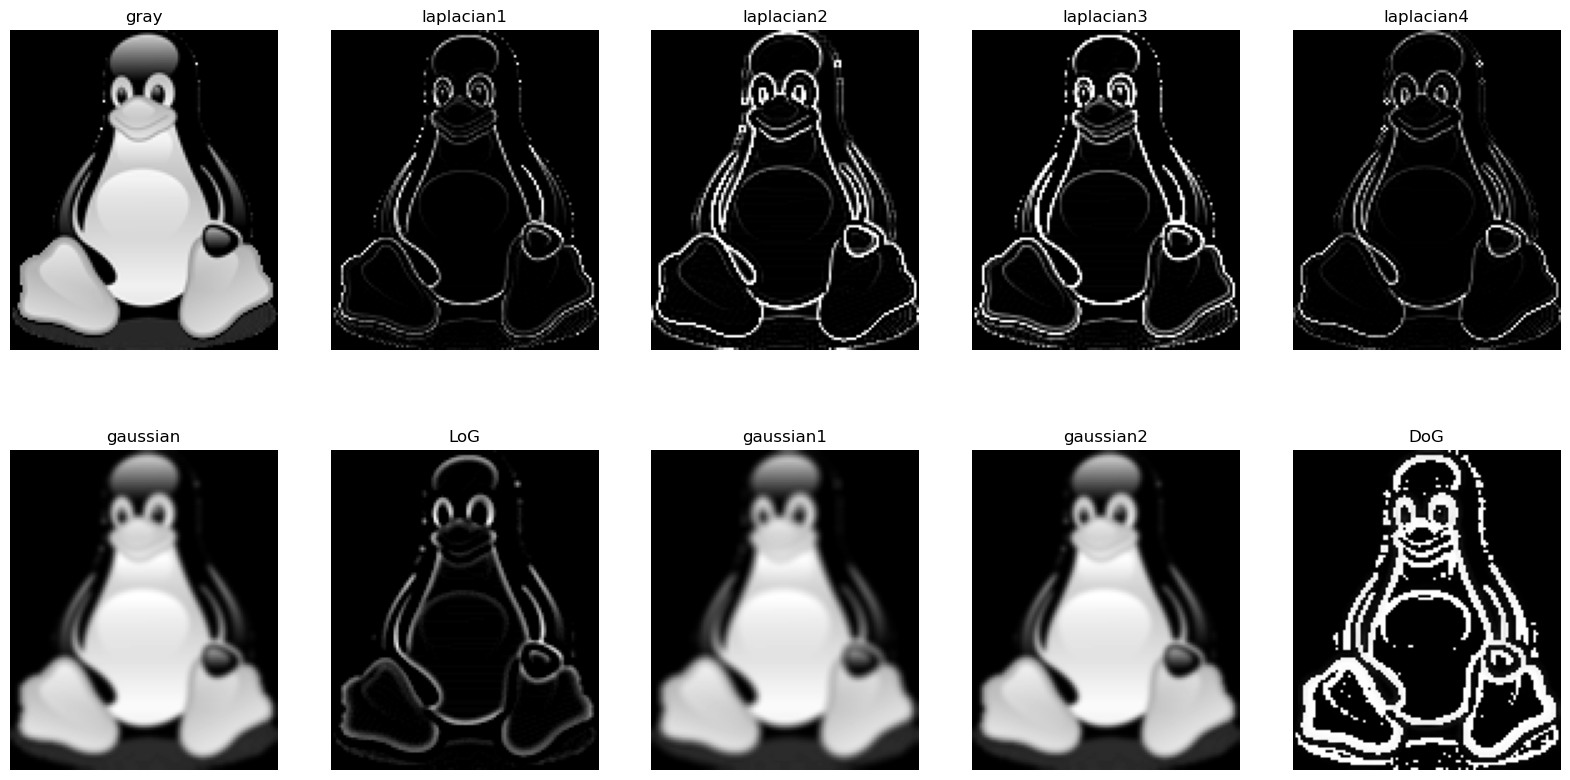

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(2, 5, 1)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis("off")
plt.subplot(2, 5, 2)
plt.imshow(laplacian1.astype(float), cmap='gray')
plt.title('laplacian1')
plt.axis("off")
plt.subplot(2, 5, 3)
plt.imshow(laplacian2.astype(float), cmap='gray')
plt.title('laplacian2')
plt.axis("off")
plt.subplot(2, 5, 4)
plt.imshow(laplacian3.astype(float), cmap='gray')
plt.title('laplacian3')
plt.axis("off")
plt.subplot(2, 5, 5)
plt.imshow(laplacian4.astype(float), cmap='gray')
plt.title('laplacian4')
plt.axis("off")
plt.subplot(2, 5, 6)
plt.imshow(gaussian, cmap='gray')
plt.title('gaussian')
plt.axis("off")
plt.subplot(2, 5, 7)
plt.imshow(LoG.astype(float), cmap='gray')
plt.title('LoG')
plt.axis("off")
plt.subplot(2, 5, 8)
plt.imshow(gaussian1, cmap='gray')
plt.title('gaussian1')
plt.axis("off")
plt.subplot(2, 5, 9)
plt.imshow(gaussian2, cmap='gray')
plt.title('gaussian2')
plt.axis("off")
plt.subplot(2, 5, 10)
plt.imshow(DoG, cmap='gray')
plt.title('DoG')
plt.axis("off")
plt.show()